In [19]:
#Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
import statsmodels.api as sm

%matplotlib inline 

In [2]:
#load data using pandas and view part of it
test_data=pd.read_csv('B2_mosquito_data.csv', sep=',')
test_data.head()

,year,temperature,rainfall,mosquitos
0,1960,84,129,151
1,1961,76,135,149
2,1962,82,194,194
3,1963,87,181,190
4,1964,78,152,164


In [3]:
#Specify Question/hypothesis about data

Does the amount of rainfall have an effect on the temperature?
I predict that the more it rains the colder the temperature will be. 

In [4]:
#choose stats test by
#step 1)identify relevent data

relevent=test_data[['rainfall','temperature']] 
relevent.head()

,rainfall,temperature
0,129,84
1,135,76
2,194,82
3,181,87
4,152,78


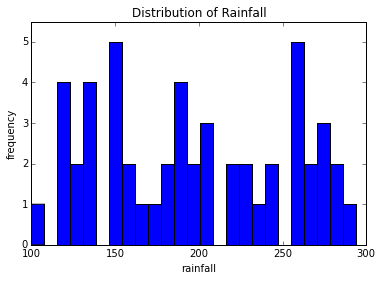

In [36]:
#step 2) veiw distribution of data using plots
#Histogram
plt.hist(relevent.rainfall, bins=25)
plt.xlabel('rainfall')
plt.ylabel('frequency')
plt.title('Distribution of Rainfall')

plt.ylim(0,5.5)

plt.show()

/Users/sabrinadesoto/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


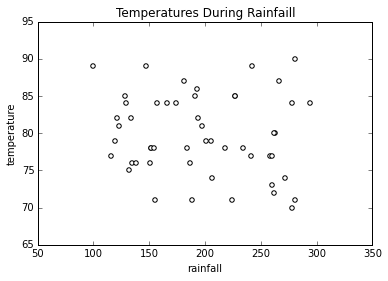

In [7]:
#Scattler plot

relevent.plot(kind='scatter', x='rainfall', y='temperature', color='w', title='Temperatures During Rainfaill')

plt.show()

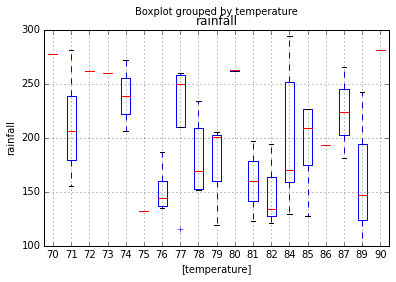

In [11]:
#Boxplot

relevent[['temperature','rainfall']].boxplot(by='temperature')
plt.ylabel('rainfall')

plt.show()

In [35]:
#plots show that data does not appear to have a correlation but lets check:

In [24]:
#run Shapiro Wilks Test to determine what type of distribution data is
#rainfall
scipy.stats.shapiro(relevent.rainfall)
#p<.05 so we say data is not normally distributed

(0.9431881308555603, 0.016518188640475273)

In [25]:
#temperature
scipy.stats.shapiro(relevent.temperature)
#p>.05 so data could be normally distributed 

(0.9668543338775635, 0.16325534880161285)

In [33]:
#for non-normal distribution of rainfall do spearmans correlation
scipy.stats.spearmanr(relevent.rainfall,relevent.temperature)

(-0.10374913658359729, 0.46875424604646931)

In [30]:
#for normal distribution of temperature do pearsons correlation
scipy.stats.pearsonr(relevent.rainfall, relevent.temperature)

(-0.12748639392010672, 0.37265588167512742)

In [34]:
#Discusion of results

I started by using the Shapiro Wilks test to see if my data was of normal distribution. I found that temperature is but rainfall is not.
Pearson's correlation says that values close to -1 or +1 imply an exact linear relationship. Values closer to 0 imply there is no correllation. Both of my values are closer to 0 than a whole integer which tells me that my hypothesis was most likely wrong and that temperature is not effected by rainfall. However this is under the assumption that all of my data falls under a normal distribution, which is only half true. To analyze the rainfall data which is not normally distributed I used spearmans correlation method. A negative value of this (not close to 0) says that as rainfall increases, temperature decreases but a positive value says that they both increase together. Since I got a small negative value in one case but a larger positive value in the other, I take this that there is no strong correlation but it is leaning towards that side that while rainfall increases so does temperature, which is opposite from my hypothesis. 